# Read the dataset

In [1]:
import pandas as pd
df=pd.read_csv('IMDB Dataset.csv')

# EDA

In [2]:
print(df.shape)

(50000, 2)


In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
print(df['sentiment'].value_counts())

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [5]:
# Balance dataset (Ensure equal positive & negative reviews)
p = df[df['sentiment']=='positive'][:25000]
n = df[df['sentiment']=='negative'][:25000]

new = pd.concat([p,n],axis=0)
print(new.shape)

new['sentiment'].value_counts()

df = new

(50000, 2)


In [6]:
df.head(1)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive


In [7]:
print(df['sentiment'].value_counts())

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


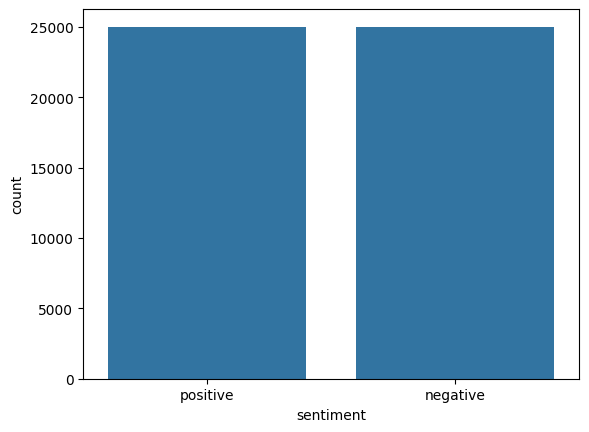

In [8]:
# Visualizing class distribution
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='sentiment',data=df)
plt.show()

In [9]:
positive_review=list(df[df['sentiment']=='positive']['review'])[:]
negative_review=list(df[df['sentiment']=='negative']['review'])[:]

In [10]:
print(len(positive_review))

25000


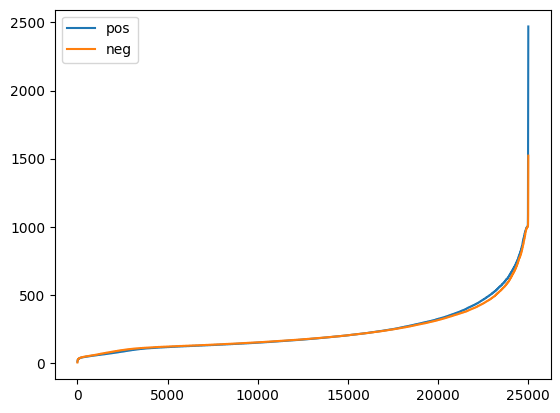

In [11]:
# word count

charlen_pos = []
for i in positive_review:
    charlen_pos.append(len(i.split()))

charlen_neg = []
for i in negative_review:
    charlen_neg.append(len(i.split()))

import matplotlib.pyplot as plt
charlen_pos.sort()
charlen_neg.sort()
plt.plot(range(len(charlen_pos)),charlen_pos)
plt.plot(range(len(charlen_neg)),charlen_neg)
plt.legend(['pos','neg'])
plt.show()

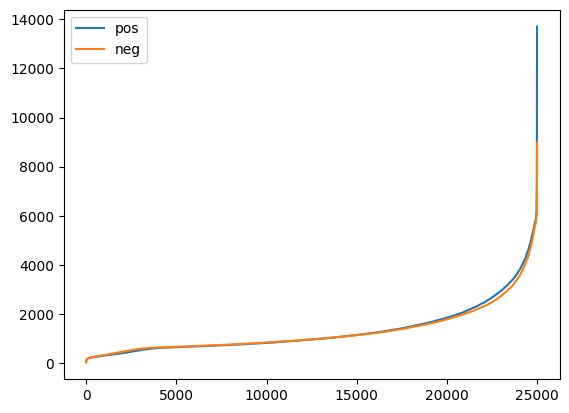

In [12]:
 # word count

charlen_pos = []
for i in positive_review:
    charlen_pos.append(len(i))

charlen_neg = []
for i in negative_review:
    charlen_neg.append(len(i))

import matplotlib.pyplot as plt
charlen_pos.sort()
charlen_neg.sort()
plt.plot(range(len(charlen_pos)),charlen_pos)
plt.plot(range(len(charlen_neg)),charlen_neg)
plt.legend(['pos','neg'])
plt.show()

In [13]:
# pip install wordcloud

In [14]:
from wordcloud import WordCloud,STOPWORDS
from matplotlib import pyplot as plt
stopwords=set(STOPWORDS)

In [15]:
def create_cloud(string, title=None):
    cloud = WordCloud(height=1080,
                      width=1920,
                      background_color='white',
                      min_font_size=10,
                      stopwords=STOPWORDS).generate(string)
    plt.figure(figsize=(10,20))
    plt.imshow(cloud)
    plt.axis("off")
    if title:
        plt.title(title, fontdict={'fontsize':24})
    plt.show()

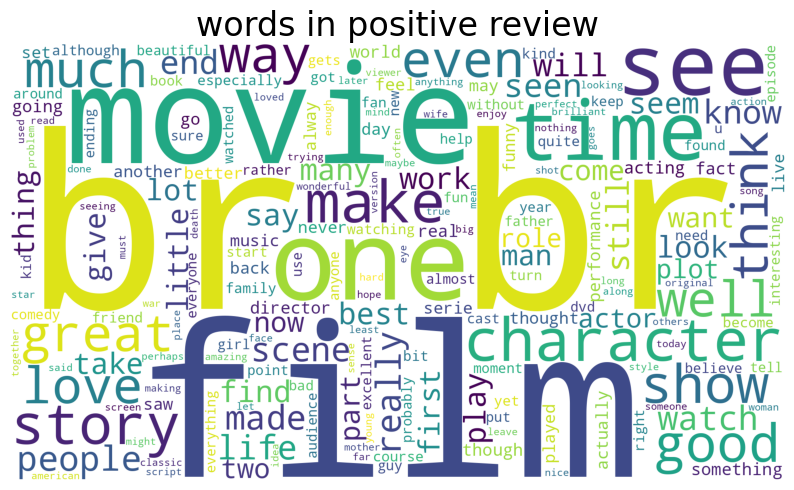

In [16]:
create_cloud(' '.join(positive_review).lower(),'words in positive review')

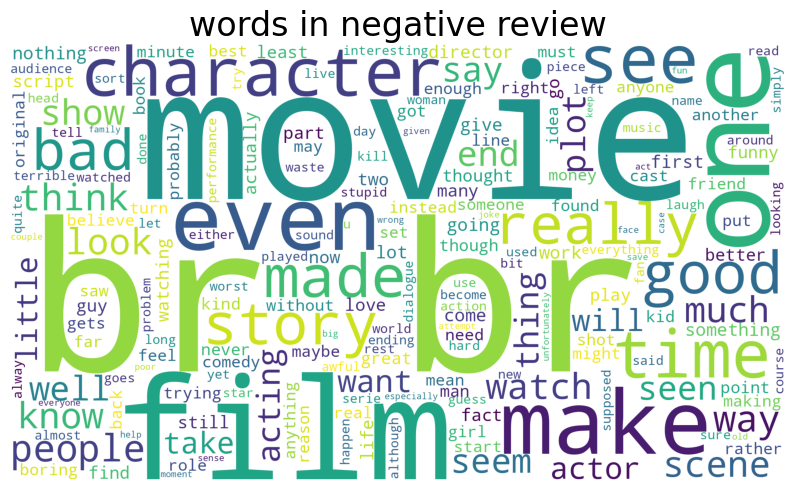

In [17]:
create_cloud(' '.join(negative_review).lower(),'words in negative review')

# Cleaning

In [18]:
# Data Cleaning Function (Removing HTML, contractions, and stopwords)
from tqdm import tqdm
def text_processing(data,colum_name):
    from bs4 import BeautifulSoup
    import re
    def decontracted(phrase):
        # specific
        phrase= re.sub(r'<br /><br />',' ',phrase)
        phrase = re.sub(r"won't", "will not", phrase)
        phrase = re.sub(r"can\'t", "can not", phrase)

        # general
        phrase = re.sub(r"n\'t", " not", phrase)
        phrase = re.sub(r"\'re", " are", phrase)
        phrase = re.sub(r"\'s", " is", phrase)
        phrase = re.sub(r"\'d", " would", phrase)
        phrase = re.sub(r"\'ll", " will", phrase)
        phrase = re.sub(r"\'t", " not", phrase)
        phrase = re.sub(r"\'ve", " have", phrase)
        phrase = re.sub(r"\'m", " am", phrase)
        phrase = re.sub(r'"', " ", phrase)
        return phrase
    stopwords=set(STOPWORDS)

    # Combining all the above sentence,
    from tqdm import tqdm
    preprocessed_reviews = []
    # tqdm is for printing the status bar
    for sentance in tqdm(data[colum_name].values):
        sentance = re.sub(r"http\S+", "", sentance)
        sentance = BeautifulSoup(sentance, 'lxml').get_text()
        sentance = decontracted(sentance)
        sentance = re.sub("\S*\d\S*", "", sentance).strip()
        # https://gist.github.com/sebleier/554280
        sentance = ' '.join(e.lower() for e in sentance.split() if e not in stopwords)
        preprocessed_reviews.append(sentance.strip())

    from nltk.stem import PorterStemmer

    porter = PorterStemmer()
    list_of_sentence=[]
    for  sentence in preprocessed_reviews:
        words_in_sentence=[]
        for words in sentence.split():
            words_in_sentence.append(porter.stem(words))

        list_of_sentence.append(' '.join(words_in_sentence))
    return(list_of_sentence)

In [19]:
# Apply text processing
df['cleaned_review'] = text_processing(df, 'review')

100%|██████████| 50000/50000 [00:25<00:00, 1993.75it/s]


In [20]:
df.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod will hooked...
1,A wonderful little production. <br /><br />The...,positive,a wonder littl production. the film techniqu u...
2,I thought this was a wonderful way to spend ti...,positive,i thought wonder way spend time hot summer wee...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...
5,"Probably my all-time favorite movie, a story o...",positive,"probabl all-tim favorit movie, stori selflessn..."


In [21]:
# Convert sentiment labels to binary values (1 = positive, 0 = negative)
df['sentiment_score'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Prepare the data for the ML model

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_review'], df['sentiment_score'], test_size=0.3, random_state=0)

In [23]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(35000,) (15000,) (35000,) (15000,)


In [24]:
print(y_train.value_counts())

sentiment_score
0    17558
1    17442
Name: count, dtype: int64


# BOW

In [25]:
# Convert text to numerical representation using BOW
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=10000)
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)
print('The top words used',vectorizer.get_feature_names_out())
print('type of bow',type(X_train_bow))
print('Matrix representation',X_train_bow.toarray()[:1])
print('shape',X_train_bow.shape,X_test_bow.shape)

The top words used ['aaron' 'abandon' 'abbey' ... 'zoom' 'zorro' 'zucco']
type of bow <class 'scipy.sparse._csr.csr_matrix'>
Matrix representation [[0 0 0 ... 0 0 0]]
shape (35000, 10000) (15000, 10000)


In [26]:
print('Before smote traning',list(y_train).count(1),list(y_train).count(0))
print('Before smote test',list(y_test).count(1),list(y_test).count(0))

Before smote traning 17442 17558
Before smote test 7558 7442


In [27]:
# Handle class imbalance using SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_bow, y_train)

In [28]:
print('After smote traning',list(y_train_resampled).count(1),list(y_train_resampled).count(0))

After smote traning 17558 17558


# KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X_train_resampled, y_train_resampled)

# Test the training data
y_pred_train = knn.predict(X_train_bow)
accuracy_train = accuracy_score(y_pred_train,y_train)
f1_train = f1_score(y_pred_train,y_train)


# Test the test data
y_pred_test = knn.predict(X_test_bow)
accuracy_test = accuracy_score(y_pred_test,y_test)
f1_test = f1_score(y_pred_test,y_test)


print('accuracy_train - ',accuracy_train,'accuracy_test - ', accuracy_test)
print('f1_train - ', f1_train,'f1_test - ', f1_test)

accuracy_train -  0.5652285714285714 accuracy_test -  0.5594
f1_train -  0.6909061363774858 f1_test -  0.6893244958397969


In [30]:
from sklearn.metrics import classification_report
target_names = [ 'Negative','Positive']
print(classification_report(y_train, y_pred_train, target_names=target_names))

              precision    recall  f1-score   support

    Negative       0.86      0.16      0.27     17558
    Positive       0.53      0.98      0.69     17442

    accuracy                           0.57     35000
   macro avg       0.70      0.57      0.48     35000
weighted avg       0.70      0.57      0.48     35000



In [31]:
from sklearn.metrics import confusion_matrix
c= confusion_matrix(y_train,y_pred_train)
print(c)

[[ 2776 14782]
 [  435 17007]]


In [32]:
from sklearn.metrics import classification_report
target_names = [ 'Negative','Positive']
# print(classification_report(y_pred_test, y_test, target_names=target_names))
print(classification_report(y_train, y_pred_train, target_names=target_names))

              precision    recall  f1-score   support

    Negative       0.86      0.16      0.27     17558
    Positive       0.53      0.98      0.69     17442

    accuracy                           0.57     35000
   macro avg       0.70      0.57      0.48     35000
weighted avg       0.70      0.57      0.48     35000



<Axes: >

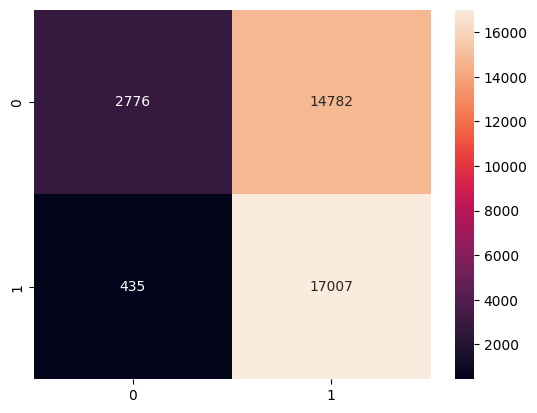

In [33]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
c= confusion_matrix(y_train,y_pred_train)
sns.heatmap(c, annot=True, fmt='g')

In [34]:
# Train additional models on a subset (40%) of the data
X_subset, _, y_subset, _ = train_test_split(X_train_bow, y_train, train_size=0.4, random_state=42)

In [35]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

svm = SVC()
rf = RandomForestClassifier()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [36]:
svm.fit(X_subset, y_subset)
rf.fit(X_subset, y_subset)
xgb.fit(X_subset, y_subset)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:49:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [37]:
# Predictions
y_pred_test_svm = svm.predict(X_test_bow)
y_pred_test_rf = rf.predict(X_test_bow)
y_pred_test_xgb = xgb.predict(X_test_bow)


KNN Performance:
              precision    recall  f1-score   support

           0       0.82      0.14      0.24      7442
           1       0.53      0.97      0.69      7558

    accuracy                           0.56     15000
   macro avg       0.68      0.56      0.47     15000
weighted avg       0.68      0.56      0.47     15000

Confusion Matrix:


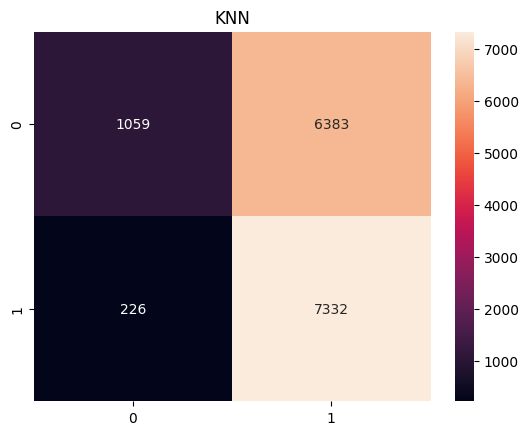


SVM Performance:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      7442
           1       0.84      0.89      0.86      7558

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000

Confusion Matrix:


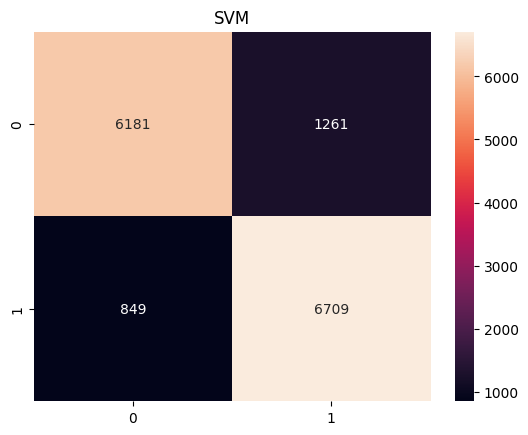


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      7442
           1       0.85      0.83      0.84      7558

    accuracy                           0.84     15000
   macro avg       0.84      0.84      0.84     15000
weighted avg       0.84      0.84      0.84     15000

Confusion Matrix:


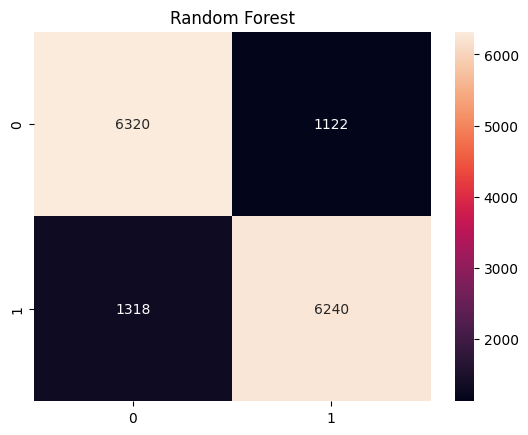


XGBoost Performance:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      7442
           1       0.83      0.85      0.84      7558

    accuracy                           0.84     15000
   macro avg       0.84      0.84      0.84     15000
weighted avg       0.84      0.84      0.84     15000

Confusion Matrix:


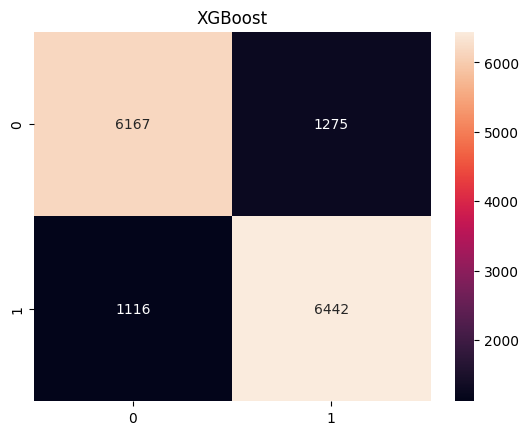

In [38]:
# Compare models
models = {'KNN': y_pred_test, 'SVM': y_pred_test_svm, 'Random Forest': y_pred_test_rf, 'XGBoost': y_pred_test_xgb}
for name, y_pred in models.items():
    print(f"\n{name} Performance:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
    plt.title(name)
    plt.show()

In [39]:
# Select best model and fine-tune with full data
final_model = xgb  # Assuming XGBoost performed best

# Hyperparameter tuning for XGBoost

In [40]:
param_grid = {
    'n_estimators': [100, 200, 300],  # More trees improve performance but increase training time
    'max_depth': [3, 6, 9],  # Deeper trees capture more patterns but risk overfitting
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Lower values ensure stable training
    'subsample': [0.7, 0.8, 1.0],  # Fraction of data to train each tree
    'colsample_bytree': [0.7, 0.8, 1.0],  # Fraction of features for each tree
    'gamma': [0, 0.1, 0.2],  # Minimum loss reduction to split further
    'reg_alpha': [0, 0.01, 0.1],  # L1 regularization (Lasso)
    'reg_lambda': [1, 2, 5]  # L2 regularization (Ridge)
}

In [41]:
from sklearn.model_selection import RandomizedSearchCV
tuner = RandomizedSearchCV(final_model, param_distributions=param_grid, n_iter=10, scoring='accuracy', cv=3, verbose=2, n_jobs=-1)
tuner.fit(X_train_bow, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:56:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 6, 9],
                                        'n_estimators': [100, 200, 300],
                                        'reg_alpha': [0, 0.01, 0.1],
                                        'reg_lambda': [1, 2, 5],
                                        'subsample': [0.7, 0.8, 1.0]},
                   scoring='accuracy', verbose=2)

In [42]:
# Train final model on full dataset
best_model = tuner.best_estimator_
print(tuner.best_params_)
best_model.fit(X_train_bow, y_train)

{'subsample': 0.7, 'reg_lambda': 1, 'reg_alpha': 0.01, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.8}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:57:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

Final Model Performance:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      7442
           1       0.86      0.88      0.87      7558

    accuracy                           0.87     15000
   macro avg       0.87      0.87      0.87     15000
weighted avg       0.87      0.87      0.87     15000



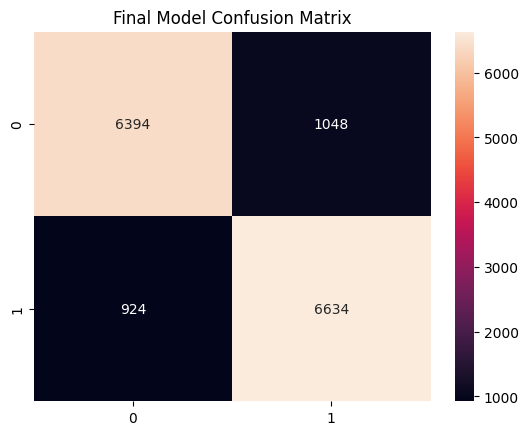

In [43]:
# Evaluate final model
y_pred_final = best_model.predict(X_test_bow)
print("Final Model Performance:")
print(classification_report(y_test, y_pred_final))
sns.heatmap(confusion_matrix(y_test, y_pred_final), annot=True, fmt='g')
plt.title("Final Model Confusion Matrix")
plt.show()